In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import stochastic_plots as stoch
import examen_ordinaria_PE_2020_2021_plantilla_corregido as pe
from arrival_process_simulation import *
import BM_simulators as bm
from exercises import *
# Author: <alberto.suarez@uam.es>


# Exercise 1: Simulation of a Continuous-time Markov Chain

## Continuous-time Markov Chain

$$
\tilde P = (p_{ij}) =\begin{pmatrix}
  0 & 1 & 0\\
  0 & 0 & 1\\
  1/2 & 1/2 & 0
\end{pmatrix}.
$$

$\tilde \pi=(\tilde \pi_1, \tilde \pi_2,\tilde \pi_3)$, $\tilde \pi P=\tilde \pi$
$$
(\tilde \pi_1 \ \tilde \pi_2 \ \tilde \pi_3)=\begin{pmatrix}
  0 & 1 & 0\\
  0 & 0 & 1\\
  1/2 & 1/2 & 0
\end{pmatrix}=(\tilde \pi_1 \ \tilde \pi_2 \ \tilde \pi_3).
$$

$$
\begin{cases}
  \displaystyle
  \frac{\tilde \pi_3}{2} = \tilde \pi_1,\\
  \displaystyle \tilde \pi_1 + \frac{\tilde \pi_3}{2}=\tilde \pi_2,\\
  \tilde \pi_2 = \tilde \pi_3.
\end{cases}
$$

$\tilde \pi_3 = 2\tilde \pi_1$ y $\tilde \pi_3=\tilde \pi_2$

$$
\left(\frac{\mu}{2}, \mu, \mu\right).
$$

$\tilde \pi_1 + \tilde \pi_2 + \tilde \pi_3 = 1$

$$
\tilde \pi = \frac{1}{\frac{\mu}{2} + \mu + \mu}\left(\frac{\mu}{2}, \mu, \mu\right) = \left( \frac{1}{5}, \frac{2}{5},\frac{2}{5}\right).
$$

$\pi=(\pi_1, \pi_2, \pi_3)$.

$$
\pi_j=\frac{\dfrac{\tilde \pi_j}{\lambda_j}}{S}, \quad j=1,2,3, \quad \text{donde } S = \sum_{k=1}^3 \frac{\tilde \pi_k}{\lambda_k}.
$$

$S=\frac{1}{10} + \frac{2}{5} + \frac{2}{15} = \frac{19}{30},$

$$
\pi=\frac{30}{19}\left( \frac{1}{10}, \frac{2}{5}, \frac{2}{15}\right) = \left( \frac{3}{19}, \frac{12}{19}, \frac{4}{19}\right).
$$

$G=(g_{ij})$.

$$
g_{ij}=\begin{cases}
  \lambda_ip_{ij}, & i\neq j,\\
  -\lambda_i, & i=j.
\end{cases}
$$

$$
G=\begin{pmatrix}
  -2 & 2 & 0\\
  0 & -1 & 1\\
  3/2 & 3/2 & -3
\end{pmatrix}.
$$

$$
\pi^TG=0 \implies (\pi_1 \ \pi_2 \ \pi_3)\begin{pmatrix}
  -2 & 2 & 0\\
  0 & -1 & 1\\
  3/2 & 3/2 & -3
\end{pmatrix} = 0.
$$

$$
\begin{cases}
  \displaystyle -2\pi_1 + \frac{3}{2}\pi_3=0,\\
  \displaystyle 2\pi_1 -\pi_2+\frac{3}{2}\pi_3=0,\\
  \displaystyle \pi_2-3\pi_3=0.
\end{cases}
$$

$2\pi_1=\frac{3}{2}\pi_3$ y $\pi_2=3\pi_3$

$$
\left(\frac{3}{4}\mu, 3\mu, \mu \right), \quad \mu \in \mathbb R.
$$

Como $\pi$ debe ser una verdadera distribución, imponemos la condición de normalización para obtener la distribución estacionaria:
$$
\pi = \frac{1}{\frac{3}{4}\mu + 3\mu + \mu}\left(\frac{3}{4}\mu, 3\mu, \mu \right) = \left(\frac{3}{19}, \frac{12}{19}, \frac{4}{19} \right).
$$


En general, la distribución estacionaria $\tilde \pi$ del proceso de saltos subyacente a una cadena de Markov, y la distribución estacionaria $\pi$ de la propia cadena de Markov no coinciden. Una condición suficiente para que coincidan es que $\lambda_i=\lambda$ para todo $i$. En efecto, en ese caso se tiene:
$$
\pi = \frac{\displaystyle \frac{1}{\lambda}\tilde\pi}{\displaystyle \frac{1}{\lambda} \sum \tilde \pi_j}=\tilde\pi, \quad \text{ya que } \sum \tilde \pi_j = 1.
$$

Así, una CMTC en la que coinciden ambas distribuciones sería por ejemplo la misma cadena del enunciado, pero considerando $\lambda_1=\lambda_2=\lambda_3=1$.\\


In [52]:
# Transition matrix of the jump process

P = np.array([[0. , 1. , 0. ],
              [0. , 0. , 1. ],
              [0.5, 0.5, 0. ]])


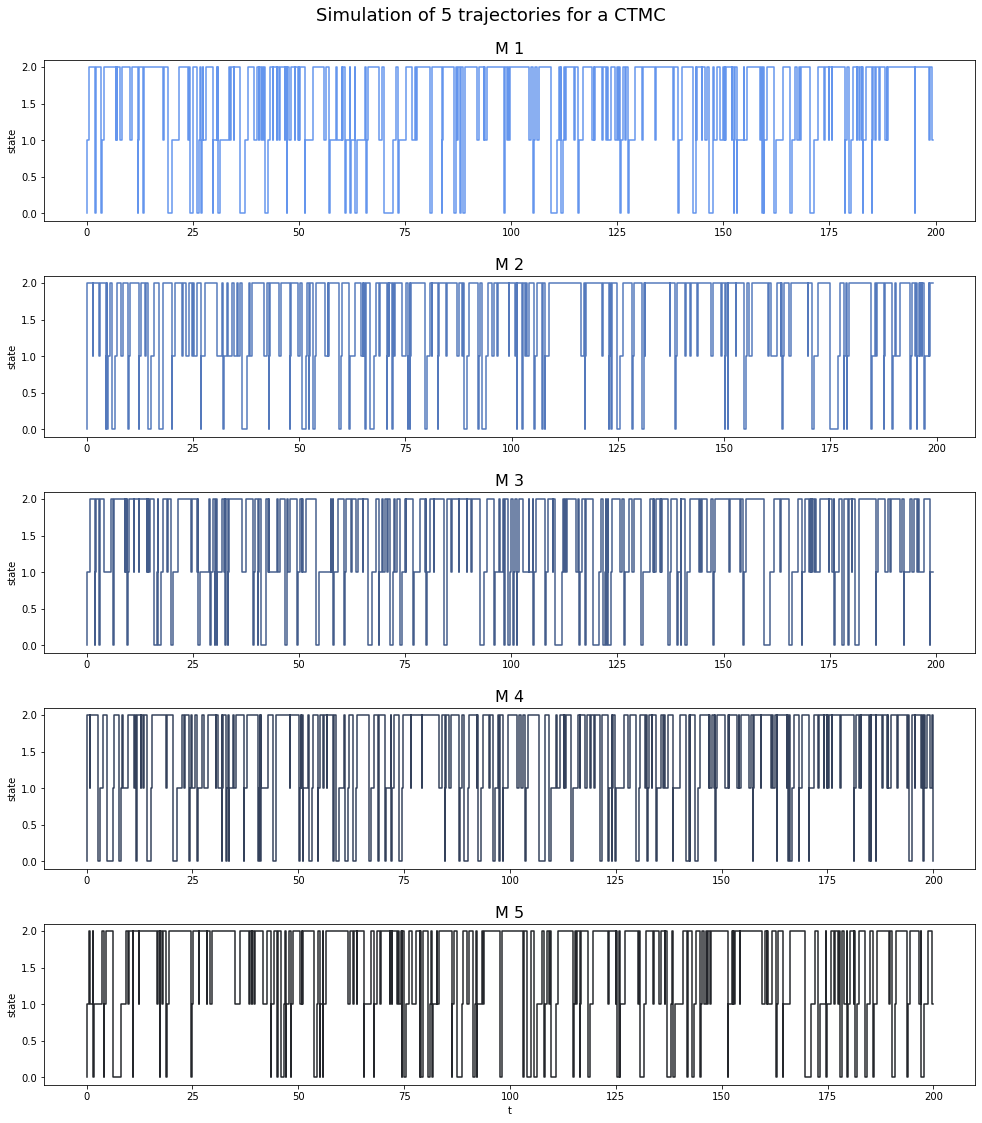

In [53]:
# Simulation of a few trajectories

lambda_rate1, lambda_rate2, lambda_rate3 = 2., 1., 3.
lambda_rates = [lambda_rate1, lambda_rate2, lambda_rate3]

T, M = 5, 5
t0, t1 = 0., 200.

arrival_times_CTMC, trajectories_CTMC = pe.simulate_continuous_time_Markov_Chain(P, lambda_rates, 0, M, t0, t1)

pe.plot_ctmc_simulation(arrival_times_CTMC, trajectories_CTMC, M)

In [10]:
# Save arrival times and trajectories
times, trajectories = arrival_times_CTMC[0], trajectories_CTMC[0]

In [11]:
# Stationary distribution of the jump process from a single trajectory

# Get number of states
_, total = np.unique(trajectories, return_counts=True)

# Get distribution
total = total/np.sum(total)

print("Stationary distribution of the jump process from a single trajectory: {}".format(total))

Stationary distribution of the jump process from a single trajectory: [0.18709677 0.40645161 0.40645161]


In [12]:
# Stationary distribution of the CTMC from a single trajectory ## REVISAR

# Store n states
n_states = len(lambda_rates)

# Add final time to arrival times
times = np.append(np.array(times), t1)

# Compute jumps which correspond to each state
jumps = [np.where(np.array(trajectories) == st)[0] for st in range(n_states)]

# Final time
final_time = [np.sum(times[j+1]) - np.sum(times[j]) for j in jumps]

print("Stationary distribution of the CTMC from a single trajectory: {}".format(final_time/np.array(t1-t0)))

Stationary distribution of the CTMC from a single trajectory: [0.17189193 0.60339204 0.22471603]


In [13]:
# Stationary distribution of the CTMC from the final state in a sample of M trajectories

# Number of trajectories
M = 1000

# New simulation
arrival_times_CTMC, trajectories_CTMC = pe.simulate_continuous_time_Markov_Chain(P, lambda_rates, 0, M, t0, t1)

# Get final distribution
final_states = [tr[-1] for tr in trajectories_CTMC]
_, total = np.unique(final_states, return_counts=True)
total = total/np.sum(total)

print("Stationary distribution of the CTMC from the final state in a sample of M trajectories: {}".format(total))

Stationary distribution of the CTMC from the final state in a sample of M trajectories: [0.159 0.617 0.224]


## Exercise 2: Simulation of a Brownian bridge process

### Expected value of the standard Wiener process

Consider the expression for the standard Brownian bridge
$$ 
BB_{std}(t) = W(t) - W(1) \, t 
$$

The mean of this process is
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) - W(1) \, t \right]
$$
The expected value operator is linear. Therefore, 
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) \right] - \mathbb{E}\left[ W(1) \right] t.
$$
Since process $W(t)$ has zero mean $\mathbb{E}\left[ W(t) \right] = 0, \ \forall t \ge 0$
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = 0, \quad \forall t \in \left[0, 1 \right].
$$

### Covariance function for the standard Brownian bridge

The covariance function for the standard Brownian bridge is defined as
$$ 
\gamma(t,s) = 
 \mathbb{E} \left[\left(BB_{std}(s) - \mathbb{E}\left[ BB_{std}(s) \right] \right)  \left(BB_{std}(t) \right] - \mathbb{E}\left[ BB_{std}(t) \right] \right). 
$$ 
Using 
$$ 
BB_{std}(t) = W(t) - W(1) \, t, \quad \mathbb{E}\left[ BB_{std}(t) \right] = 0
,$$ 
and 
$$
\gamma(s, t) = 
 \mathbb{E} \left[ \left(W(s) - W(1) \, s \right) \left(W(t) - W(1) \,  t \right)\right] =
 \mathbb{E} \left[ W(s) W(t) \right]  + \mathbb{E} \left[W^2(1)\right] s t - \mathbb{E} \left[W(1) W(t)\right] \, s 
- \mathbb{E} \left[W(s) W(1) \right]  \, t. 
$$ 
Finally, taking into account that
$$ 
\mathbb{E}\left[ W(s) W(t) \right] = \min(s, t), $$ 
one gets 
$$ 
\gamma(s, t) =  \min(s, t) + s t - t s - s t = \min(s, t) - s t. 
$$ 


### Mean function for a general Brownian bridge

### Covariance function for a general Brownian bridge

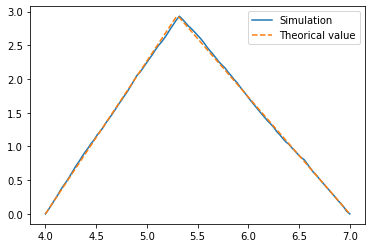

In [8]:
## Brownian bridge simulation

t0, t1 = 4., 7.
B0, B1 = 1., 3.
M, N = 5000, 100
sigma = 2.
t_ref =  5.3

ts, BB = bm.simulate_Brownian_bridge(t0, B0, t1, B1, sigma, M, N)

ts_ref = np.where(ts >= t_ref)[0][0]

covar = [np.mean((BB[:,t] - np.mean(BB[:,t])) * (BB[:,ts_ref] - np.mean(BB[:,ts_ref]))) for t in range(len(ts))]

def cov_th(t, s, sigma, t1, t0):
    return sigma**2 * (np.minimum(t-t0, s-t0) - ((s-t0)*(t-t0))/(t1-t0))

plt.plot(ts, covar, label="Simulation")
plt.plot(ts, cov_th(ts, t_ref, sigma, t1, t0), "--", label="Theorical value")

plt.legend()
plt.show()


# Exercise 3: Simulation of a stochastic volatility model

### Derivation of $\mathbb{E}\left[\sigma(t)\right]$

Consider the Ito SDE
$$
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$$
where $\alpha > 0$ is the reversion rate, $\xi > 0$ is the volatility of the stochastic process $\sigma(t)$. 

Define the process $X(t) = \sigma(t) - \sigma_{\infty}$. Since $ \sigma_{\infty} $ is constant, $dX(t) = d \sigma(t)$, and the equation becomes
$$
d X(t) = - \alpha X(t) dt + \xi dW(t).
$$


Let's take the expected value on both sizes of the equation 
$$
\mathbb{E}\left[dX(t) \right] = \mathbb{E}\left[ - \alpha  X(t) dt + \xi  dW(t) \right].
$$

Using the fact that the expected value is a linear operator, we get
$$
d\mathbb{E} \left[X(t) \right] = - \alpha \mathbb{E}\left[ X(t) \right] dt + \xi \mathbb{E}\left[ dW(t) \right].
$$
Since the Wiener process has zero mean, the equation becomes 
$$
d \mathbb{E} \left[ X(t) \right] = - \alpha  \mathbb{E} \left[ X(t) \right] dt.
$$
Using the method of separation of variables
$$
\frac{1}{ \mathbb{E} \left[ X(t) \right]} d \mathbb{E} \left[ X(t) \right] = - \alpha dt,
$$
the equation can be integrated between $(t_0, X_0)$, where $X_0 = \sigma_0 - \sigma_{\infty}$, and $\left(t,  \mathbb{E} \left[ X(t) \right] \right)$
$$
\int_{X_0}^{\mathbb{E} \left[ X(t) \right]} \frac{1}{ \mathbb{E} \left[ X \right]} d \mathbb{E} \left[ X \right]  = - \alpha \int_{t_0}^t d\tau. 
$$
The solution is
$$
\log \frac{ \mathbb{E}\left[X(t) \right] }{ X_0 } = - \alpha \left(t- t_0 \right).
$$
After some straightforward algebraic manipulation, one obtains
$$
\mathbb{E} \left[ X(t) \right] =  X_0  e^{- \alpha \left(t- t_0 \right)}.
$$
Undoing the change of variable, we obtain
$$
\mathbb{E} \left[ \sigma(t) \right] = \sigma_{\infty} + \left(\sigma_0  - \sigma_{\infty} \right)  e^{- \alpha \left(t- t_0 \right)}.
$$

### Derivation of $\text{Var}\left[\sigma(t)\right]$

### Derivation of the conditional pdf:  $\text{pdf}\left[\left.  t, \sigma(t) \right| t_0, \sigma_0 \right]$

### Simulation of the SDE $
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$


In [9]:
# Simulation of a sample of trajectories

In [10]:
# Mean and stdev of the trajectories simulated           
                              

In [11]:
# Asymptotic stationary pdf of the process

# Exercise 4: Pricing of a European call option

## Pricing by quadrature

In [12]:
# Parameters that characterize underlying 
S0 = 100.0
sigma = 0.3

# Parameters of the EU call option
K = 90.0
T = 2.0

# Risk-free interest rate
r = 0.05

price_EU_call = pe.price_EU_call(S0, K, r, sigma, T)

print('Price = {:.4f}'.format(price_EU_call))

Price = 26.2402


## Monte Carlo pricing of a European call option